Setting up the Kaggle Credentials

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'Enter your Username'
os.environ['KAGGLE_KEY'] = 'Enter your Kaggle API key'


Downloading and Unzipping the Dataset

In [2]:
!kaggle datasets download -d farzadnekouei/trash-type-image-dataset
!unzip -q trash-type-image-dataset.zip -d /content/waste_data


Dataset URL: https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset
License(s): unknown
  0% 0.00/40.9M [00:00<?, ?B/s]
100% 40.9M/40.9M [00:00<00:00, 1.03GB/s]


Loading and Preparing the Data

In [6]:
data_path = "/content/waste_data/TrashType_Image_Dataset"
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


Building the Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(train_gen.num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,534 (431.77 KB)

 Trainable params: 110,534 (431.77 KB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [14]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 229s 4s/step - accuracy: 0.2216 - loss: 1.7470 - val_accuracy: 0.2346 - val_loss: 1.6979
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.2851 - loss: 1.6361 - val_accuracy: 0.3757 - val_loss: 1.4925
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 224s 3s/step - accuracy: 0.3729 - loss: 1.5163 - val_accuracy: 0.4374 - val_loss: 1.4236
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 222s 3s/step - accuracy: 0.3901 - loss: 1.4597 - val_accuracy: 0.4453 - val_loss: 1.3819
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.3941 - loss: 1.4231 - val_accuracy: 0.4592 - val_loss: 1.3373
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.4484 - loss: 1.4036 - val_accuracy: 0.4493 - val_loss: 1.3159
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 221s 3s/step - accuracy: 0.4670 - loss: 1.3254 - val_accuracy: 0.4732 - val_loss: 1.3027
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 221s 3s/step - accuracy: 0.4702 - loss: 1.3209 - val_accuracy: 0.4990 - v

Confusion Matrix

16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step


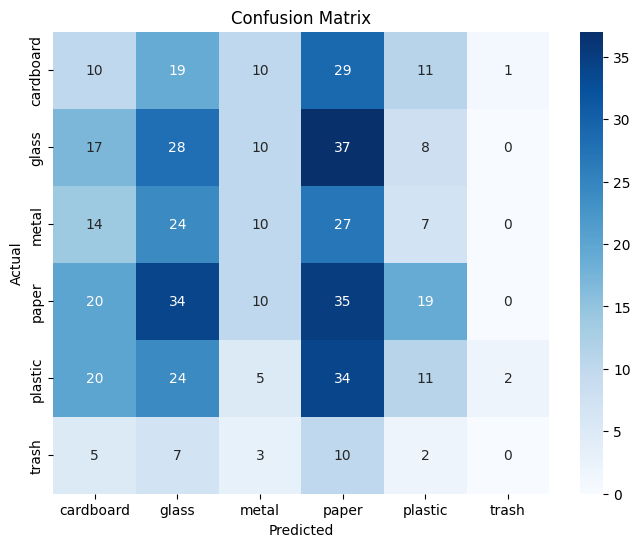

Classification Report:
              precision    recall  f1-score   support

   cardboard       0.12      0.12      0.12        80
       glass       0.21      0.28      0.24       100
       metal       0.21      0.12      0.15        82
       paper       0.20      0.30      0.24       118
     plastic       0.19      0.11      0.14        96
       trash       0.00      0.00      0.00        27

    accuracy                           0.19       503
   macro avg       0.15      0.16      0.15       503
weighted avg       0.18      0.19      0.18       503



In [20]:
#Importing necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#Getting true and predicted labels from validation set
val_gen.reset()
Y_pred = model.predict(val_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_gen.classes

#Getting class names
class_names = list(val_gen.class_indices.keys())

#Building the confusion matrix
cm = confusion_matrix(y_true, y_pred)

#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Plot training and validation accuracy/loss over epochs

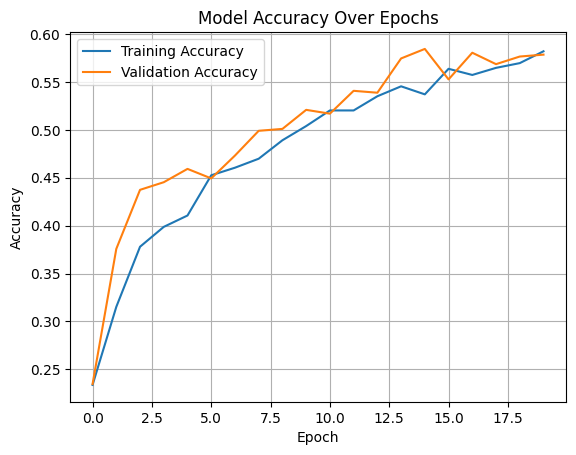

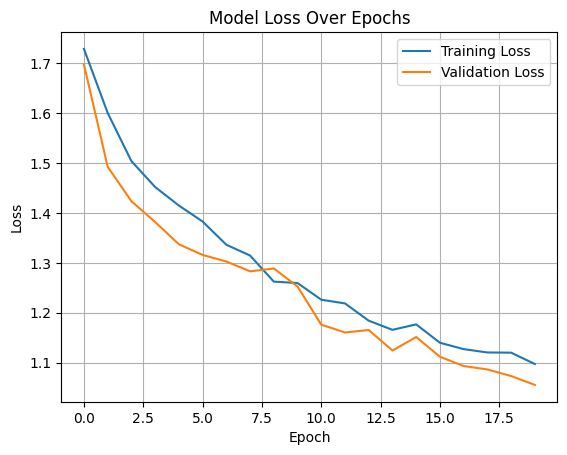

In [15]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Testing the model

In [16]:
from google.colab import files
uploaded = files.upload()

Saving plastic.jpg to plastic.jpg


In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

for file_name in uploaded.keys():
    # Load and preprocess image
    img = image.load_img(file_name, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    pred = model.predict(img_array)
    class_index = np.argmax(pred[0])
    class_labels = list(train_gen.class_indices.keys())
    predicted_label = class_labels[class_index]

    print(f"✅ {file_name} → Predicted Class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
✅ plastic.jpg → Predicted Class: plastic


In [18]:
from google.colab import files
uploaded = files.upload()

Saving Cardboard.jpg to Cardboard.jpg


In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np

for file_name in uploaded.keys():
    # Load and preprocess image
    img = image.load_img(file_name, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    pred = model.predict(img_array)
    class_index = np.argmax(pred[0])
    class_labels = list(train_gen.class_indices.keys())
    predicted_label = class_labels[class_index]

    print(f"✅ {file_name} → Predicted Class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
✅ Cardboard.jpg → Predicted Class: cardboard


Saving the trained model

In [21]:
model.save("waste_classifier_model.h5")
print("✅ Model saved successfully!")

✅ Model saved successfully!
